In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://colab.research.google.com/github/google-research/language-table/blob/main/language_table/examples/language_table_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Run In Google Colab"/></a>
  </td>
</table>

# Install Dependencies

In [2]:
!pip install git+https://github.com/google-research/language-table.git
!pip install mediapy
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/google-research/language-table.git to /tmp/pip-req-build-mtl6qcf2
  Running command git clone -q https://github.com/google-research/language-table.git /tmp/pip-req-build-mtl6qcf2
     |████████████████████████████████| 624 kB 4.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.4 MB 5.6 MB/s 
     |████████████████████████████████| 17.1 MB 43.4 MB/s 
     |████████████████████████████████| 91.7 MB 1.1 MB/s 
     |████████████████████████████████| 33.8 MB 1.3 MB/s 
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 4.7 MB 29.8 MB/s 
     |████████████████████████████████| 1.4 MB 62.5 MB/s 
     |████████████████████████████████| 295 kB 57.5 MB/s 
     |████████████████████████████████| 965 kB

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 2.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
language-table 0.1 requires matplotlib==3.6.2, but you have matplotlib 3.1.3 which is incompatible.


# Import Modules

In [1]:
import os

from language_table.environments import blocks
from language_table.environments import language_table
from language_table.environments.rewards import block2block

from matplotlib import pyplot as plt
import mediapy
import numpy as np

import tensorflow_datasets as tfds

# Language Table Environment

In [3]:
def decode_inst(inst):
  """Utility to decode encoded language instruction"""
  return bytes(inst[np.where(inst != 0)].tolist()).decode("utf-8") 

env = language_table.LanguageTable(
  block_mode=blocks.LanguageTableBlockVariants.BLOCK_8,
  reward_factory=block2block.BlockToBlockReward,
  control_frequency=10.0,
  seed=0
)
obs = env.reset()

/usr/local/lib/python3.8/dist-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Show the RGB image and print the instruction.

put the green star close to the green cube


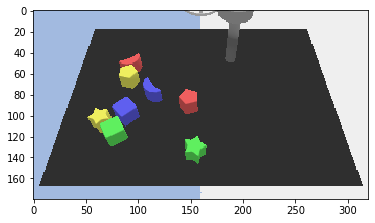

In [4]:
plt.imshow(obs['rgb'])
print(decode_inst(obs['instruction']))

Calling env.render() also gives you the RGB image with the text rendered above.

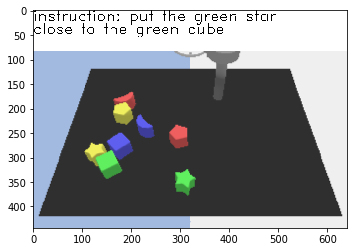

In [5]:
plt.imshow(env.render())

# Language Table Datasets

See the [RLDS Tutorial](https://colab.research.google.com/github/google-research/rlds/blob/main/rlds/examples/rlds_tutorial.ipynb) for more details on the RLDS data format.

In [6]:
DATASET_VERSION = '0.0.1'
DATASET_NAME = 'language_table'  # CHANGEME: change this to load another dataset.

dataset_directories = {
    'language_table': 'gs://gresearch/robotics/language_table',
    'language_table_sim': 'gs://gresearch/robotics/language_table_sim',
    'language_table_blocktoblock_sim': 'gs://gresearch/robotics/language_table_blocktoblock_sim',
    'language_table_blocktoblock_4block_sim': 'gs://gresearch/robotics/language_table_blocktoblock_4block_sim',
    'language_table_blocktoblock_oracle_sim': 'gs://gresearch/robotics/language_table_blocktoblock_oracle_sim',
    'language_table_blocktoblockrelative_oracle_sim': 'gs://gresearch/robotics/language_table_blocktoblockrelative_oracle_sim',
    'language_table_blocktoabsolute_oracle_sim': 'gs://gresearch/robotics/language_table_blocktoabsolute_oracle_sim',
    'language_table_blocktorelative_oracle_sim': 'gs://gresearch/robotics/language_table_blocktorelative_oracle_sim',
    'language_table_separate_oracle_sim': 'gs://gresearch/robotics/language_table_separate_oracle_sim',
}

In [7]:
dataset_path = os.path.join(dataset_directories[DATASET_NAME], DATASET_VERSION)
builder = tfds.builder_from_directory(dataset_path)
episode_ds = builder.as_dataset(split='train')

print(episode_ds.element_spec)

{'episode_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'steps': DatasetSpec({'action': TensorSpec(shape=(2,), dtype=tf.float32, name=None), 'is_first': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_last': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_terminal': TensorSpec(shape=(), dtype=tf.bool, name=None), 'observation': {'effector_target_translation': TensorSpec(shape=(2,), dtype=tf.float32, name=None), 'effector_translation': TensorSpec(shape=(2,), dtype=tf.float32, name=None), 'instruction': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'rgb': TensorSpec(shape=(360, 640, 3), dtype=tf.uint8, name=None)}, 'reward': TensorSpec(shape=(), dtype=tf.float32, name=None)}, TensorShape([]))}


## Loading Episodes
Take the first episode in the dataset, and make a video from the frames

In [8]:
episode = next(iter(episode_ds.take(1)))

frames = []
for step in episode['steps'].as_numpy_iterator():
    frames.append(step['observation']['rgb'])

mediapy.show_video(frames, title=decode_inst(step['observation']['instruction']), fps=5)

## Loading Steps
Take the first 100 steps of the dataset, and make a combined video of the frames

In [9]:
steps_ds = episode_ds.flat_map(lambda x: x['steps'])  # get the dataset as individual steps

# Make the first 100 steps of the dataset into a video.
frames = []
for step in steps_ds.take(100).as_numpy_iterator():
  frames.append(step['observation']['rgb'])
    
mediapy.show_video(frames, fps=5)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
